<a href="https://colab.research.google.com/github/semakalyon/Deep-Learning---Machine-Learning/blob/main/decode_predictions_(08_06_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.19.0'

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [38]:
vgg16_model = tf.keras.applications.VGG16(
    weights="imagenet",
    input_shape=(224,224,3),
    include_top=True
)

In [39]:
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
len(vgg16_model.layers)

23

Use pretrained ConvNet to classify one image

In [41]:
#define a class that load and preprocess one image
def load_process_image(file_path):

  #load image (in PIL image format by default)
  image_original = load_img(file_path, target_size=(224,224))
  print("image size after loading", image_original.size)

  #convert to numpy array
  image_array = img_to_array(image_original)
  print("image size after converting to numpy array", image_array.shape)

  #expand dims to add batch size as 1
  image_batch = np.expand_dims(image_array, axis=0)
  print("image size after expanding dimensions", image_batch.shape)

  #preprocess image
  image_preprocessed = tf.keras.applications.vgg16.preprocess_input(image_batch)

  return image_original, image_preprocessed

In [42]:
cat_image_file_path = "/catimg.jpg"

In [43]:
cat_image_original, cat_image_preprocessed = load_process_image(cat_image_file_path)

image size after loading (224, 224)
image size after converting to numpy array (224, 224, 3)
image size after expanding dimensions (1, 224, 224, 3)


In [44]:
cat_image_original, cat_image_preprocessed = load_process_image(cat_image_file_path)

image size after loading (224, 224)
image size after converting to numpy array (224, 224, 3)
image size after expanding dimensions (1, 224, 224, 3)


In [45]:
cat_image_original, cat_image_preprocessed = load_process_image(cat_image_file_path)

image size after loading (224, 224)
image size after converting to numpy array (224, 224, 3)
image size after expanding dimensions (1, 224, 224, 3)


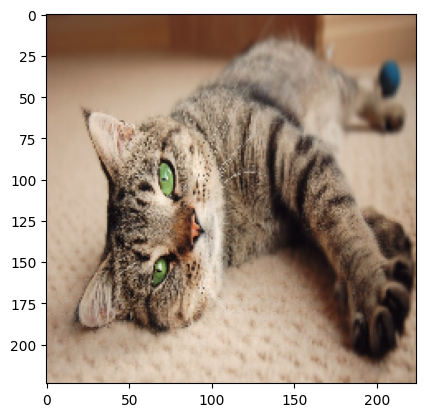

In [46]:
plt.imshow(cat_image_original)

In [47]:
predictions = vgg16_model.predict(cat_image_preprocessed)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [48]:
predictions.shape

(1, 1000)

In [49]:
predictions[0]

array([5.61816371e-09, 1.69529812e-08, 1.53338355e-08, 6.40428794e-08,
       3.45692399e-08, 9.12784692e-09, 1.56366262e-08, 2.61417966e-07,
       7.52328191e-08, 1.73231214e-07, 1.60749877e-07, 6.23453644e-09,
       6.34371489e-08, 1.27807382e-07, 4.57980942e-09, 2.35276502e-07,
       3.10712984e-08, 5.32699111e-08, 2.74540746e-08, 1.83586764e-08,
       4.61935095e-08, 2.05298623e-08, 7.94694532e-09, 1.85667673e-07,
       1.62925444e-05, 7.12785351e-08, 3.23282698e-08, 5.08313782e-08,
       1.07088830e-07, 2.78235106e-08, 5.36061862e-07, 7.99176348e-07,
       2.07653542e-07, 1.46444293e-07, 1.34220704e-06, 1.02305201e-07,
       4.06030267e-06, 3.75593373e-07, 6.42338193e-07, 3.50025289e-06,
       1.36158121e-07, 1.00088255e-06, 1.05443050e-07, 5.74850560e-07,
       1.96627275e-06, 3.09388440e-07, 1.05954371e-06, 3.36910063e-07,
       8.03099311e-08, 5.36300718e-07, 5.59493799e-07, 4.32263141e-06,
       2.08153395e-07, 1.16133357e-07, 6.74809485e-07, 8.14507857e-08,
      

In [50]:
predicted_class = decode_predictions(predictions, top=1)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [51]:
predicted_class

[[('n02123045', 'tabby', np.float32(0.46627426))]]

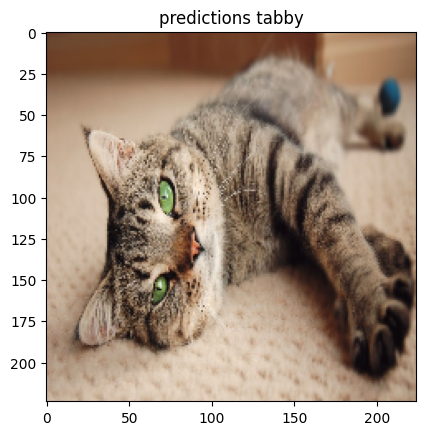

In [52]:
#show the image along with the predicted class
plt.imshow(cat_image_original)
predicted_class_name = predicted_class[0][0][1]
_ = plt.title("predictions " + predicted_class_name)